# Relatório de Análise 8

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (14, 6))

In [3]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

Teremos uma representação gráfica que nos ajudará a compreender a técnica que usaremos nesta aula para remoção de outliers. Estamos utilziando Box-plot, que possui a seguinte configuração: temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente. Teremos o Q1, que se refere ao primeiro quartil e parte em 25% e 75%, já o Q3 parte os dados em 75% e 25%. A diferente entre Q3 e Q1 gera o intervalo interquartirico, isto é, as estatísticas que geraremos para realizar o corte de outliers.

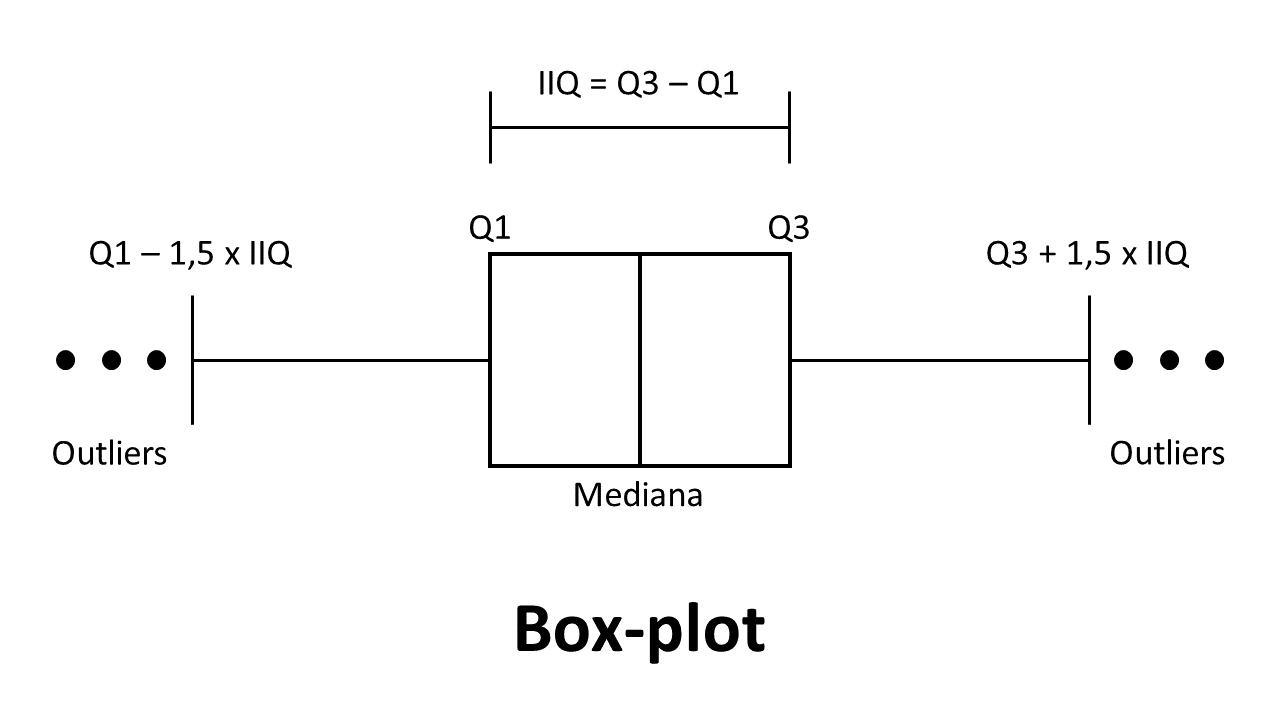

Faremos efetivamente nosso box-plot.

<AxesSubplot:>

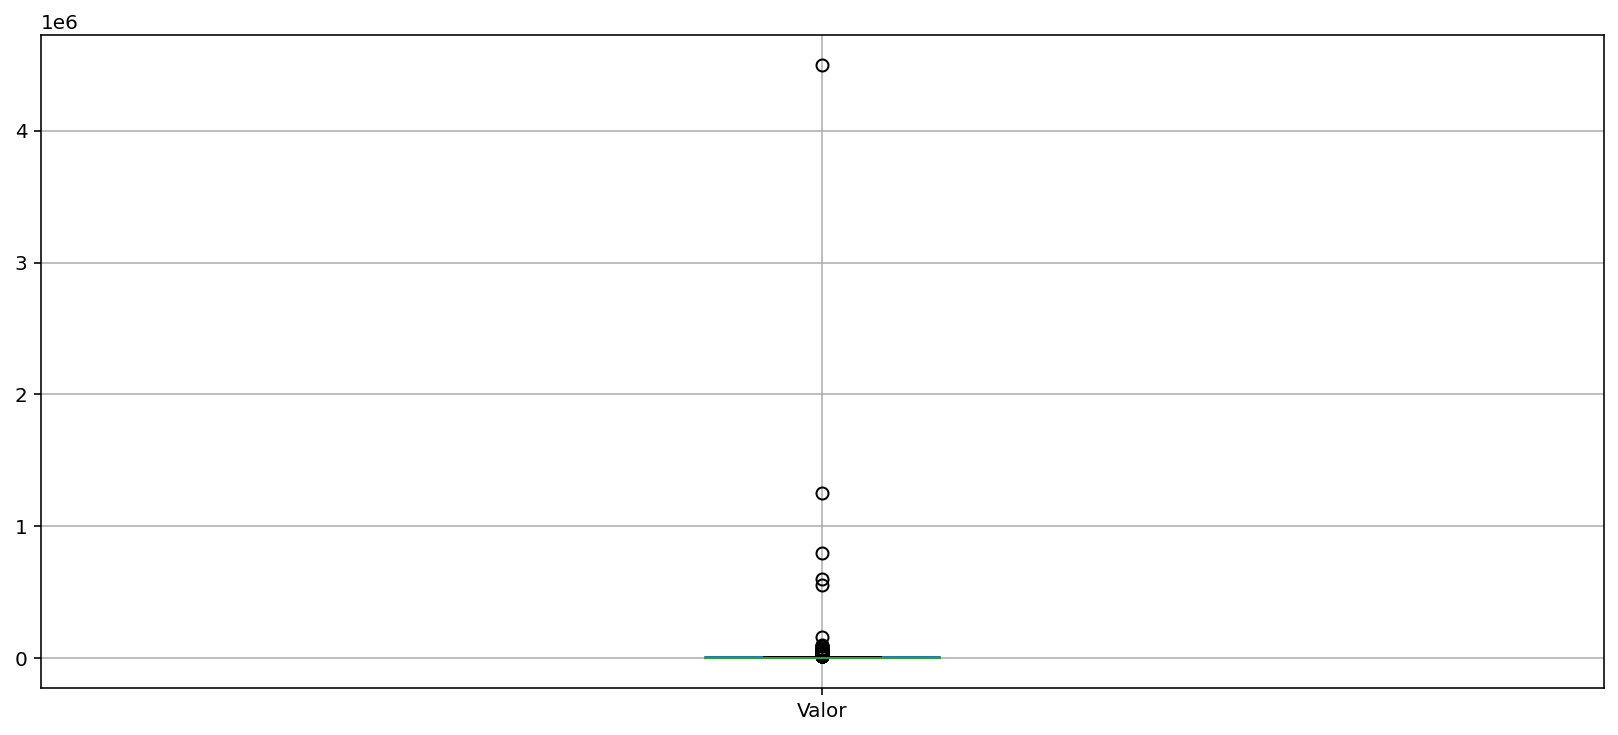

In [4]:
dados.boxplot(['Valor'])

A visualização está comprometida, afinal ele está invertido e só conseguimos perceber os dados discrepantes. Primeiramente, faremos uma visualização clara dos dados ao realizar uma seleção em nosso dataframe.

In [5]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


OBS: Lembrando que aqui temos os dados completos.   
Vamos fazer o corte e salvar pra poder usar posteriormente.

In [6]:
# Criando as estatísticas

# Primeiro vamos gerar uma Series para facilitar a visualização
valor = dados['Valor']

In [7]:
# Calculando o primeiro quartil (Q1)
Q1 = valor.quantile(.25)

# Calculando o terceiro quartil (Q3)
Q3 = valor.quantile(.75)

# Intervalo interquartírico
IIQ = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [8]:
Q1

1600.0

In [9]:
# Selecionando os dados que estão apenas nos limites do Box-plot
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

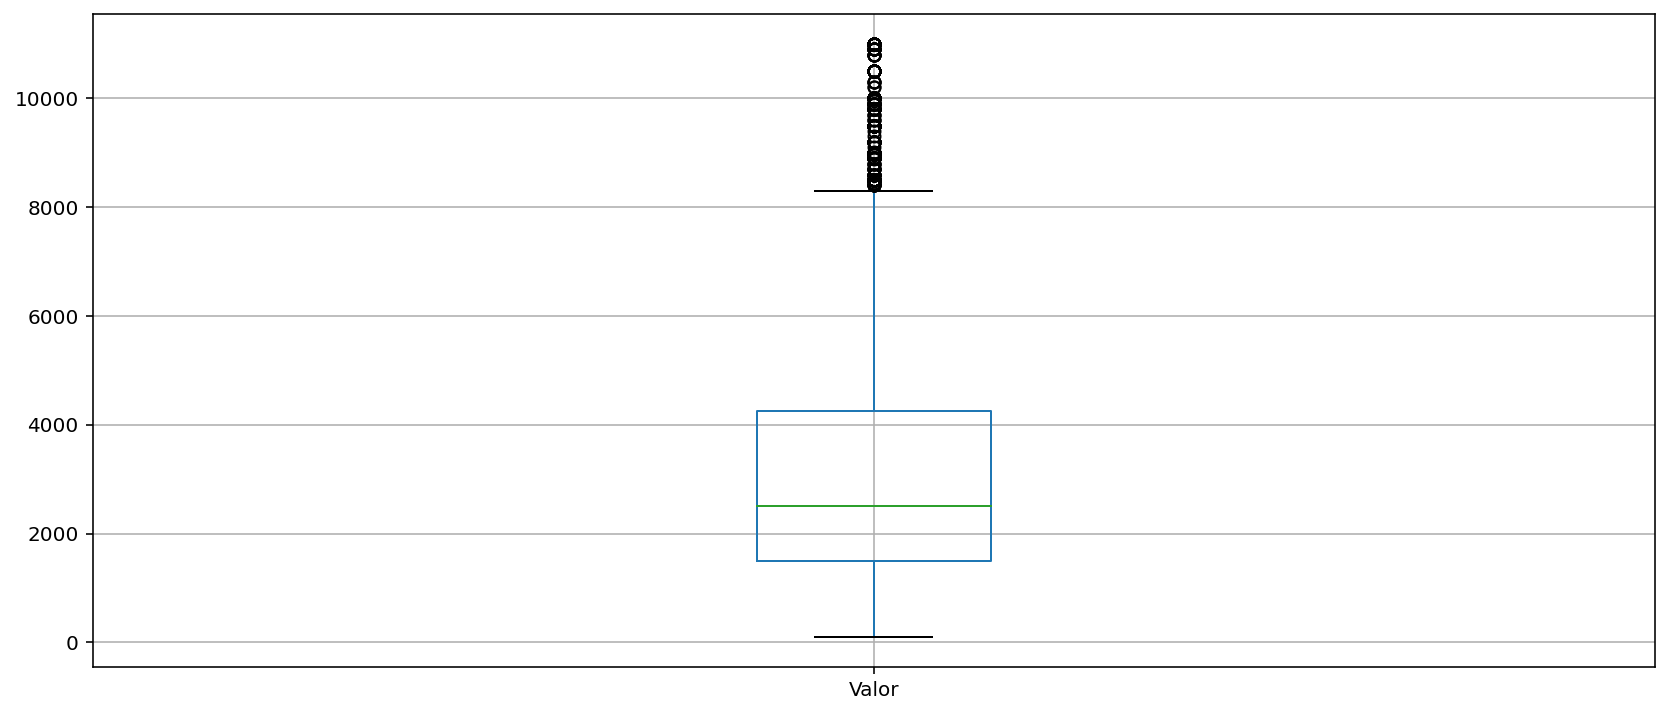

In [10]:
# Refazendo o box-plot
dados_new.boxplot(['Valor'])

__Como Cientistas de Dados, devemos analisar essa informação atentamente.   
Nosso box-plot indica ue temos dados discrepantes de 10000 de condomínio, mas em nosso banco de dados realmente    
existem imóveis de alto padrão que apresentam esse valor.   
É recomendado que se analise outras variáveis para chegar em um resultado mais preciso.   
Fica de exercício, por exemplo, separar os imóveis em bases diferentes (alto padrão, médio e baixo padrão)__

## Histograma

Agora, estudaremos o histograma, isto é, uma distribuição de frequências dos dados. Analisaremos dados e dados_new.

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

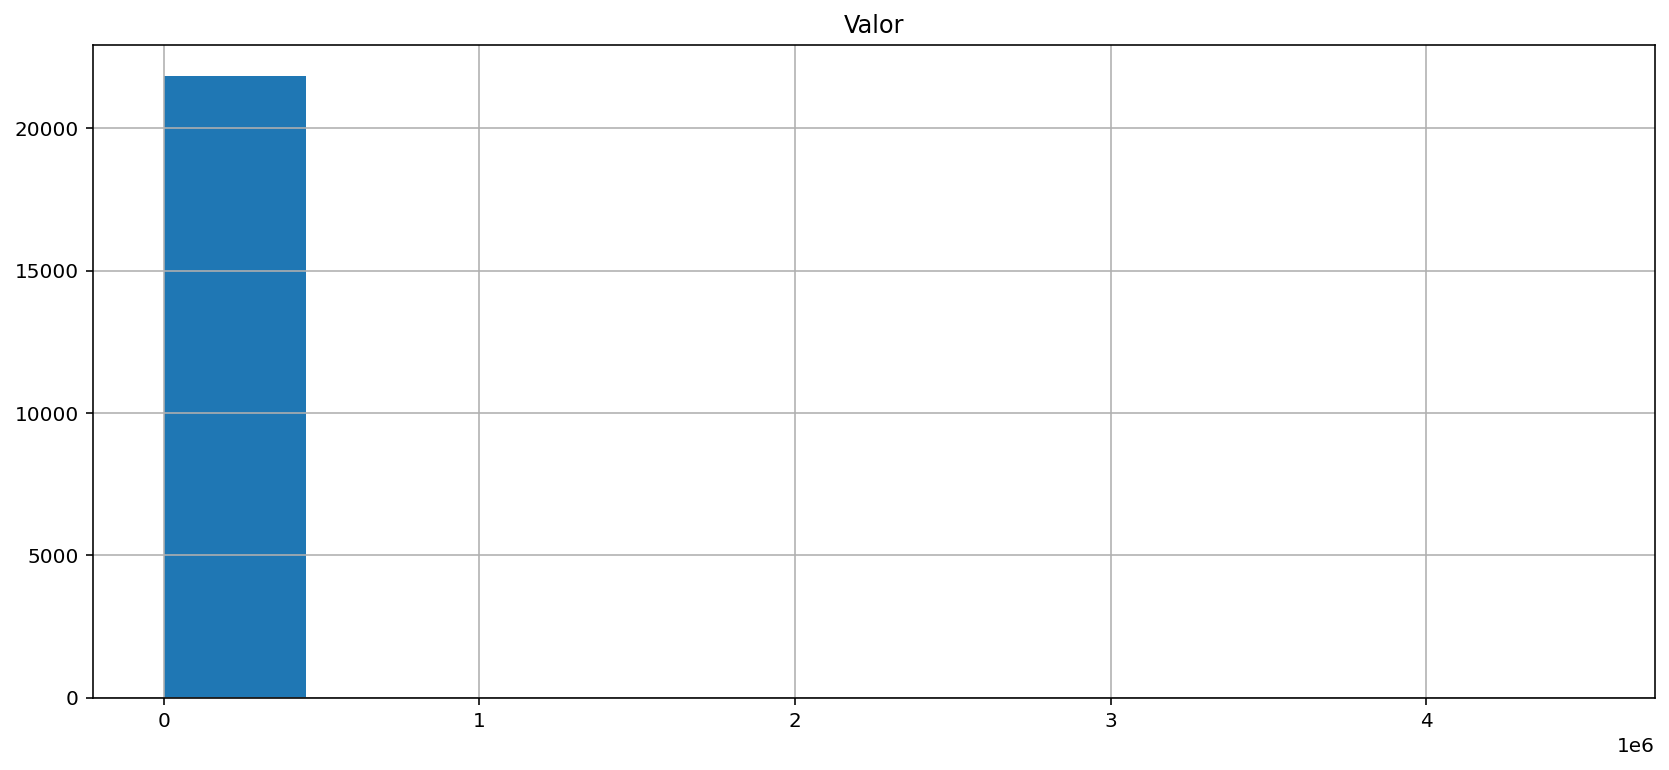

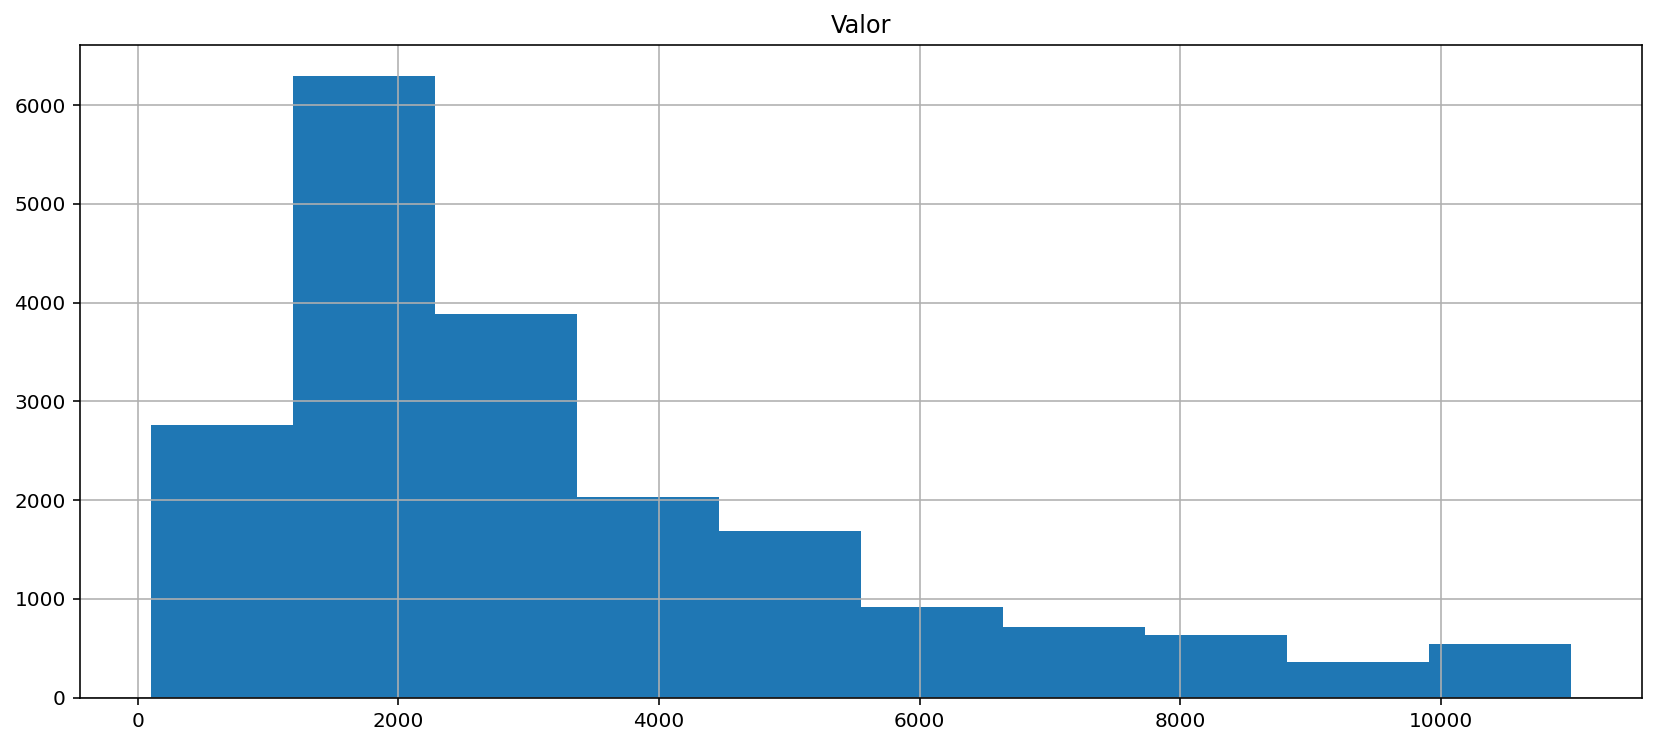

In [11]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

Para dados, teremos apenas uma barra, mas depois teremos uma distribuição de barras que nos permite algumas análises.    
Variáveis deste tipo, de valor, render, e outras coisas, são assimétricas à direita. Tem a moda < mediana < média.    
Já temos dados um pouco melhores no segundo histograma, mas seriam necessários alguns tratamentos antes de utilizar essas informações em uma regressão, por exemplo.

__Agora usaremos ainda a mesma metodologia, mas iremos desagrupar os dados e fazer uma análise modular.__

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

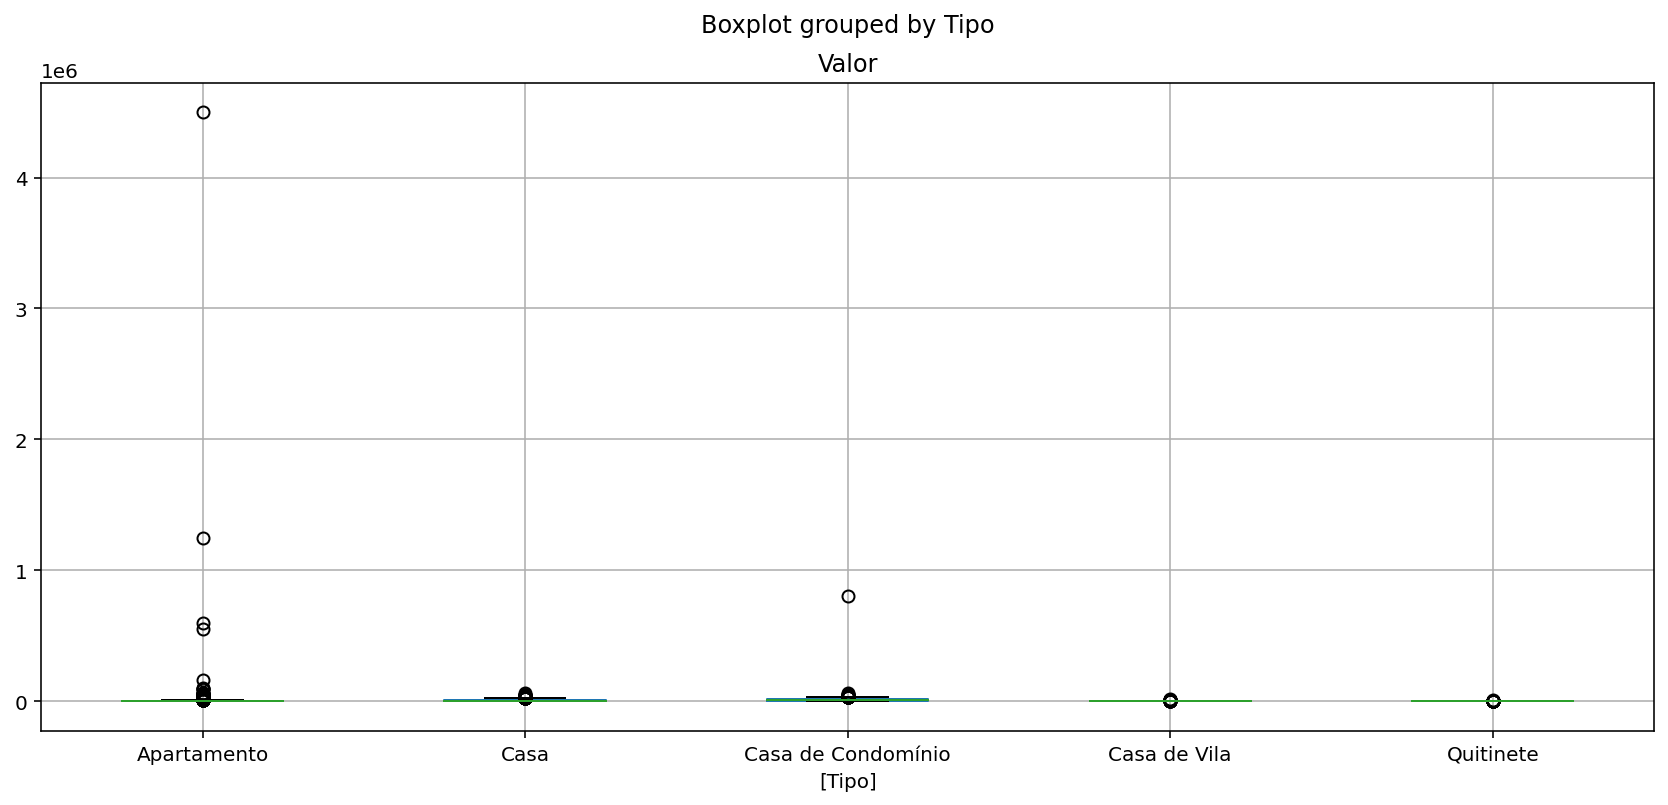

In [12]:
# Primeiramente construiremos nosso box-plot e depois prosseguimos com a análise:
dados.boxplot(['Valor'], by = ['Tipo'])

Podemos ter informações discrepantes para um tipo de imóvel que não estão em outro, e isso pode atrapalhar nossa análise caso todos os dados sejam analisados de maneira conjunta. Temos comportamentos diferentes em cada tipo de imóvel, como locações caras para condomínios de alto padrão que nunca se aplicariam a uma quitinete.

__Faremos a análise para os grupos que selecionamos.__

In [13]:
# Criaremos grupo_tipo e chamaremos os dados.
grupo_tipo = dados.groupby('Tipo')

In [14]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [15]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [16]:
# Objeto GroupBy
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [17]:
# Visualizando os dados como uma dicionário, com a chave sendo o tipo
# E os índices, onde eles estão localizados dentro do database

grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

Assim feito, estamos prontos para criar as estatísticas, utilizando a metodologia que já conhecemos:

In [18]:
# Calculando o primeiro quartil (Q1)
Q1 = grupo_tipo.quantile(.25)

# Calculando o terceiro quartil (Q3)
Q3 = grupo_tipo.quantile(.75)

# Intervalo interquartírico
IIQ = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [19]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [20]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [21]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [22]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [23]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [24]:
# Acessando o limite superior de um imóvel Tipo Apartamento
limite_superior['Apartamento']

9950.0

In [25]:
# Acessando o limite superior de um imóvel Tipo Casa
limite_superior['Casa']

22850.0

In [26]:
# Agora vamos fazer as seleções para, em seguida, fazer as exclusões do arquivo

# Primeiro vamos printar o tipo pra visualizar o que o for está iterando
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


Feito assim, criaremos um dataframe com esta seleção que realizamos. Chamaremos de dados_selecao , que receberá dados[selecao].

Nós queremos que esse procedimento seja feito com todos os tipos de imóvel, e então concatenar essas informações.    
Já sabemos realizar concatenações, e para deixar o processo todo ainda mais claro, criaremos um novo dataframe zerado    
no começo do código chamado dados_new.

Em seguida, utilizaremos concat() receberá os dois dataframes em lista. 

In [27]:
# Seleção Tipo Apartamento, Casa e Condomínio que esteja dentro dos limites do boxplot
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

Na primeira interação, dados_new estará vazio, e então seria inserido o dados_selecao,    
em que o primeiro item é Apartamento. Esse processo será repetido com todos os outros tipos de imóvel.    
Após executarmos nosso código, podemos gerar um novo box-plot que utilize dados_new :

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

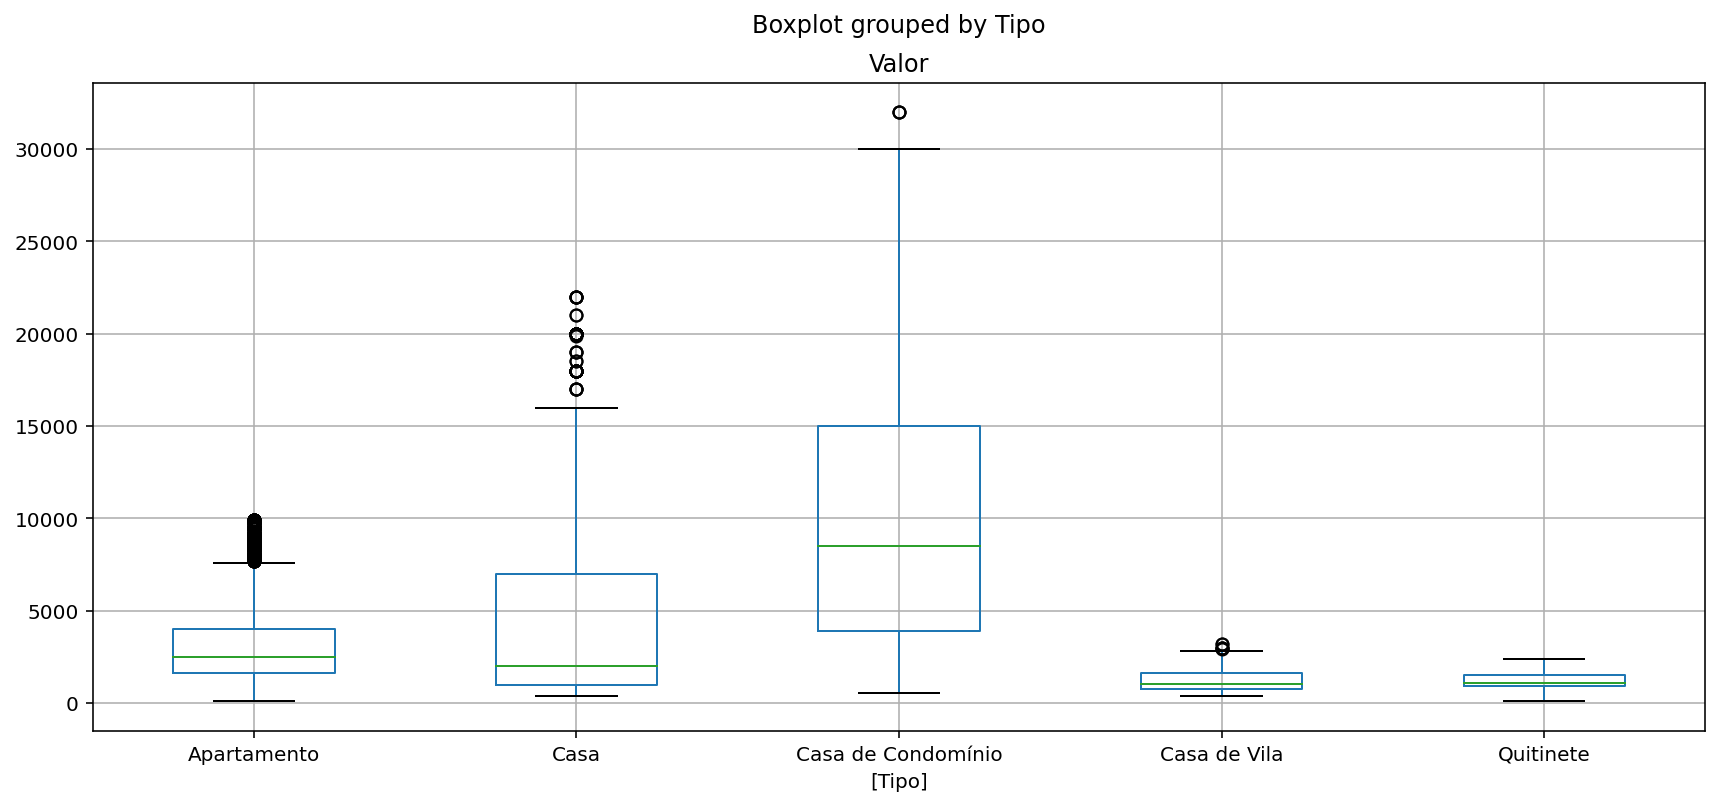

In [28]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

Temos uma análise mais fina agora para, por exemplo, Casa de Condomínio que possui um alto padrão.    
Para imóveis de baixo custo, como quitinete teremos outra representação.

In [29]:
# Agora com os dados limpos, temos que salvar para usar em análises posteriores
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

## Como um desafio, tentar fazer:

In [30]:
# Seleção apenas Tipo Casa que esteja dentro dos limites do boxplot
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == 'Casa'
    eh_dentro_limite = (dados['Valor'] >= limite_inferior['Casa']) & (dados['Valor'] <= limite_superior['Casa'])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

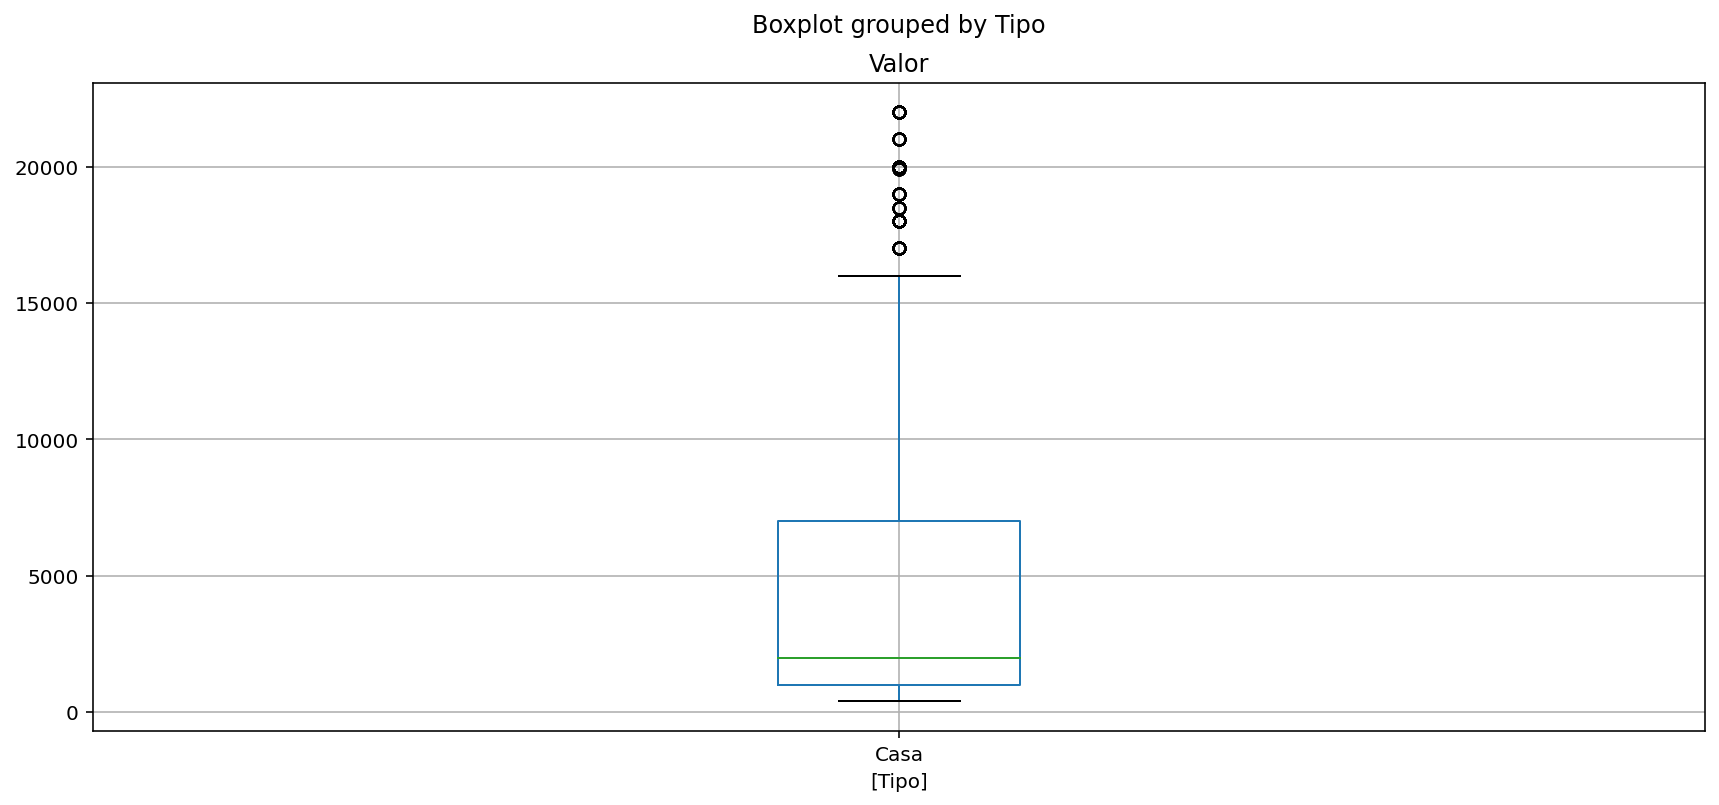

In [31]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [32]:
# Seleção apenas Tipo Casa de Vila que esteja dentro dos limites do boxplot
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == 'Casa de Vila'
    eh_dentro_limite = (dados['Valor'] >= limite_inferior['Casa de Vila']) & (dados['Valor'] <= limite_superior['Casa de Vila'])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

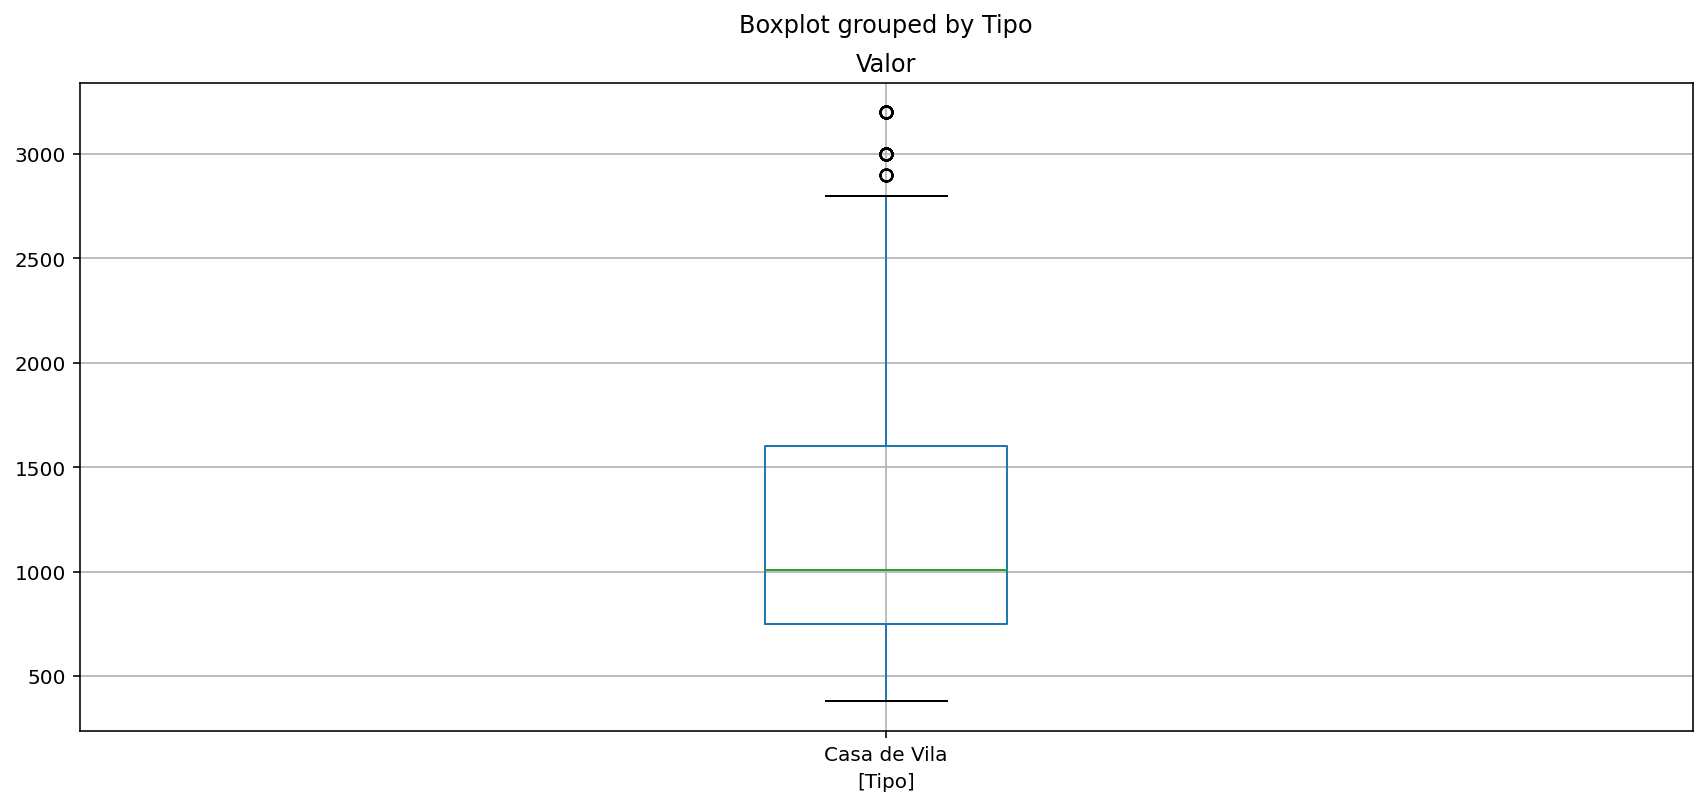

In [33]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [34]:
# Seleção apenas Tipo Casa de Condomínio que esteja dentro dos limites do boxplot
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == 'Casa de Condomínio'
    eh_dentro_limite = (dados['Valor'] >= limite_inferior['Casa de Condomínio']) & (dados['Valor'] <= limite_superior['Casa de Condomínio'])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

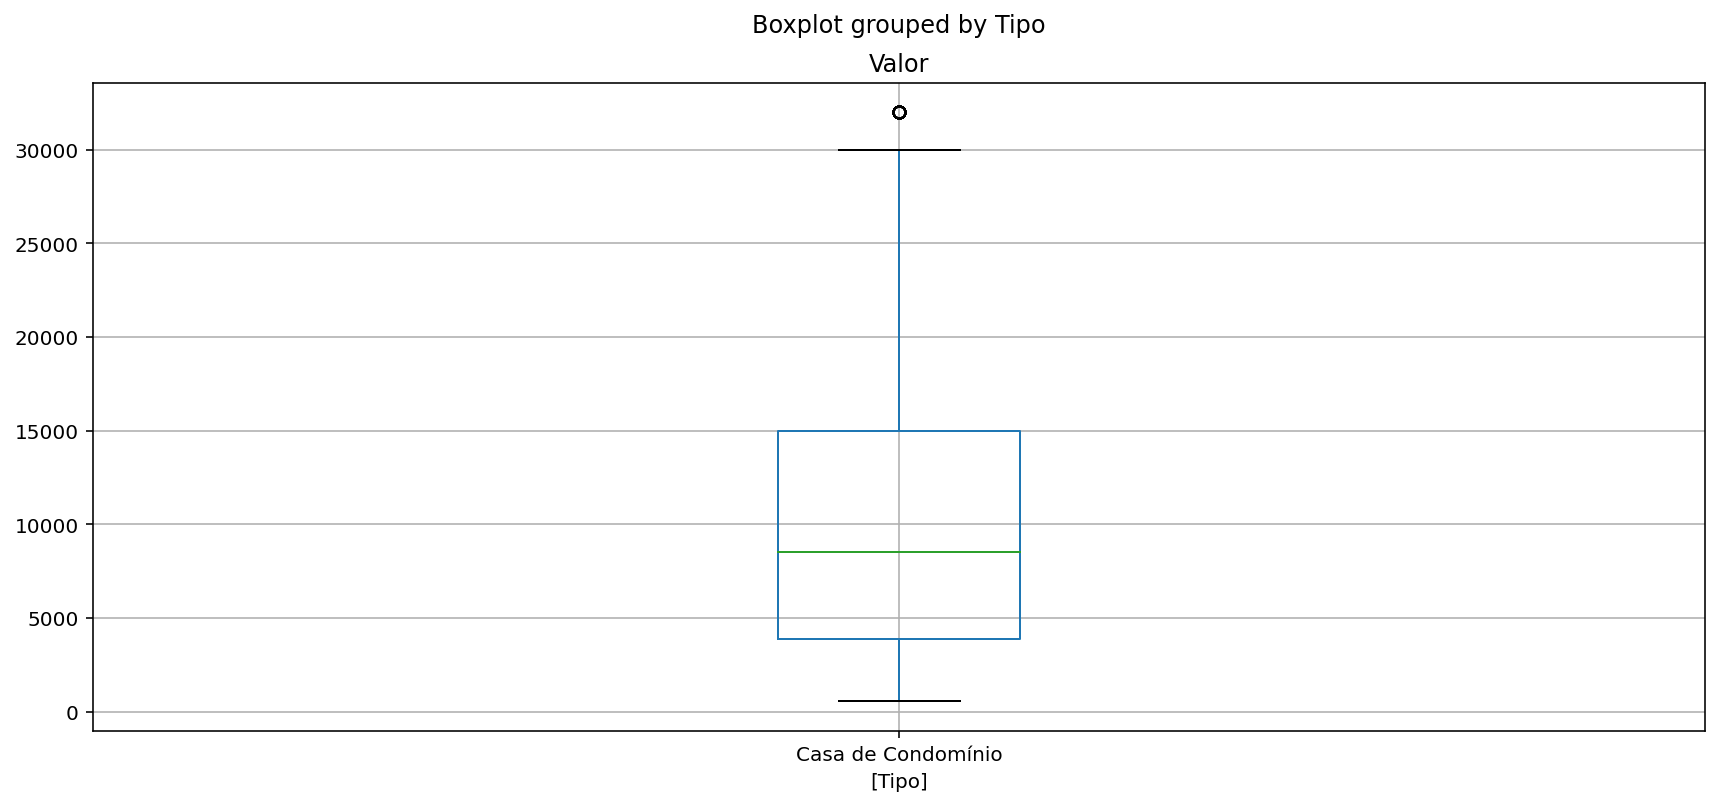

In [35]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [36]:
# Seleção apenas Tipo Apartamento e Quitinete que esteja dentro dos limites do boxplot
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = (dados['Tipo'] == 'Apartamento') | (dados['Tipo'] == 'Quitinete')
    eh_dentro_limite = (dados['Valor'] >= limite_inferior['Apartamento']) & (dados['Valor'] <= limite_superior['Apartamento']) | (dados['Valor'] >= limite_inferior['Quitinete']) & (dados['Valor'] <= limite_superior['Quitinete'])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

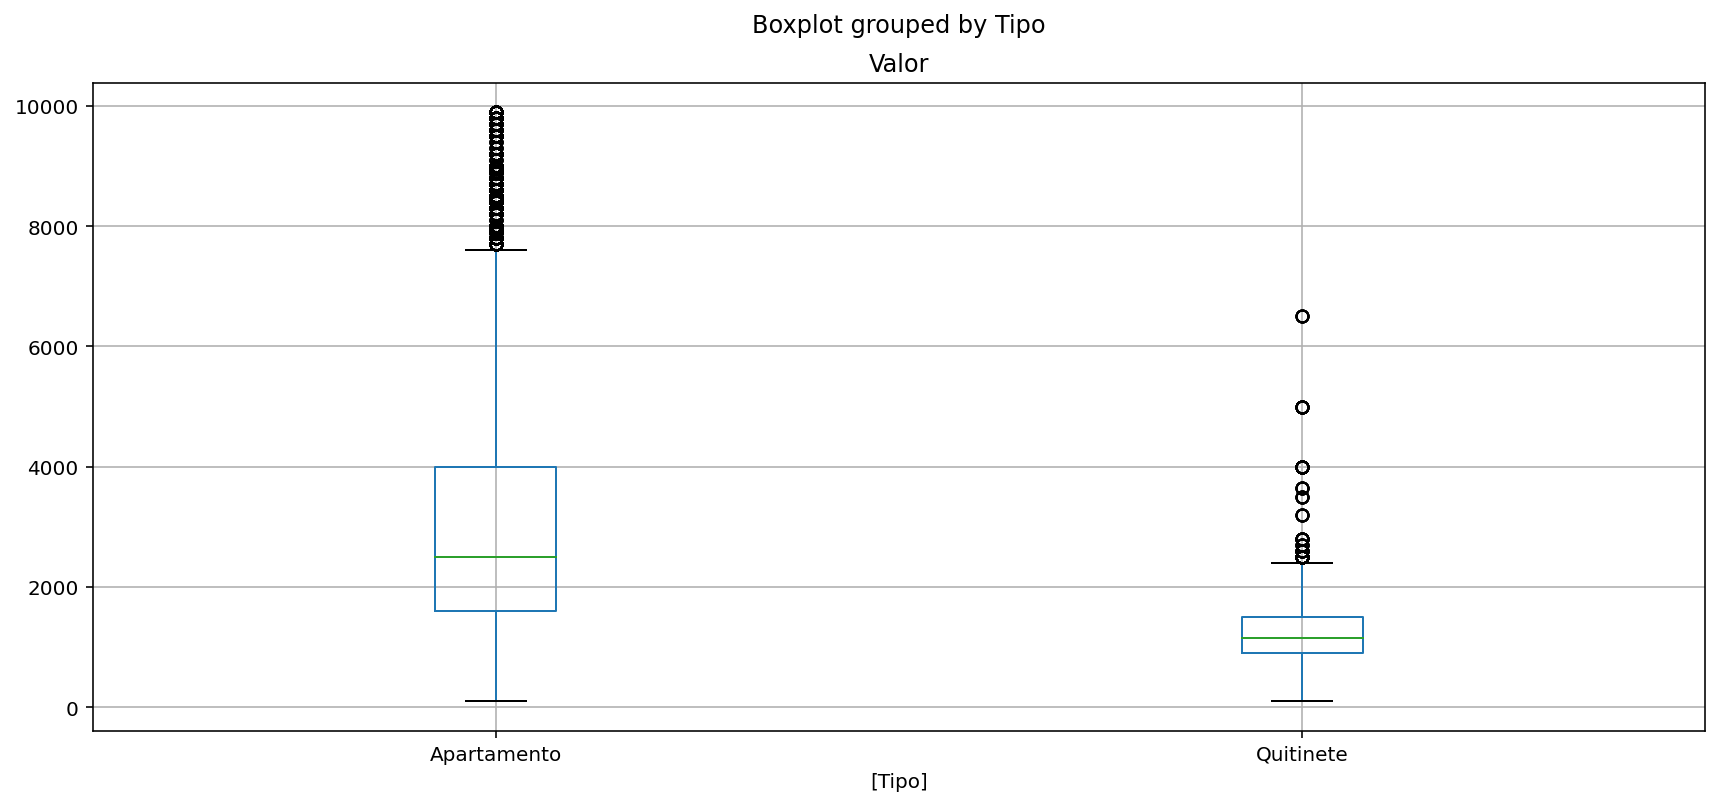

In [37]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

## Exercícios

#### 01 - Estatísticas do box plot

Considere a imagem do box plot, exibida anteriormente.

Nosso objetivo neste exercício é obter o conjunto de estatísticas representado na figura acima. Para isso, baixe aqui o arquivo aluguel_amostra.csv, e utilize-o para realizar suas análises utilizando como variável alvo o Valor m2 (valor do metro quadrado). Lembrando que Q1 representa o 1º quartil e Q3 o 3º quartil, selecione o item com a resposta correta (considere somente duas casas decimais):


In [38]:
dados = pd.read_csv('arquivo_exercicio_cap_9/aluguel_amostra.csv', sep = ';')

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


In [39]:
valor = dados['Valor m2']

```
[Q1] → 21.25
[Q3] → 42.31
[IIQ] → 21.06
[Q1 - 1.5 * IIQ] → -10.34
[Q3 + 1.5 * IIQ] → 73.90
```

In [40]:
# Calculando o primeiro quartil (Q1)
Q1 = valor.quantile(.25)

# Calculando o terceiro quartil (Q3)
Q3 = valor.quantile(.75)

# Intervalo interquartírico
IIQ = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [45]:
print(f"""
[Q1] -> {Q1}
[Q3] -> {Q3}
[IIQ] -> {IIQ:.2f}
[limite_inferior] -> {limite_inferior:.2f}
[limite_superior] -> {limite_superior:.2f}
""")


[Q1] -> 21.25
[Q3] -> 42.31
[IIQ] -> 21.06
[limite_inferior] -> -10.34
[limite_superior] -> 73.90



#### 02 - A biblioteca matplotlib

Vamos testar nosso conhecimento sobre o pacote matplotlib. Considere neste exercício o arquivo aluguel_amostra.csv e indique nas opções abaixo qual o código necessário para gerar os gráficos da figura a seguir: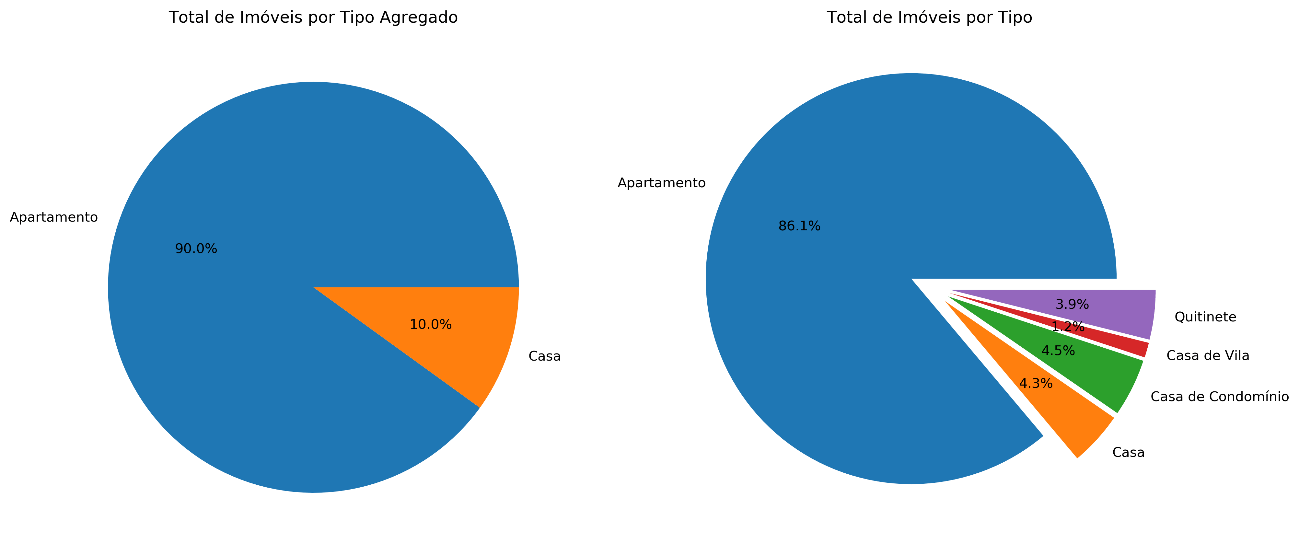

Neste exercício, estamos apresentando o gráfico de pizza que pode ser obtido com a aplicação do método pie(), de matplotlib. Considere o código inicial abaixo para escolher a alternativa correta:

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('arquivo_exercicio_cap_9/aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

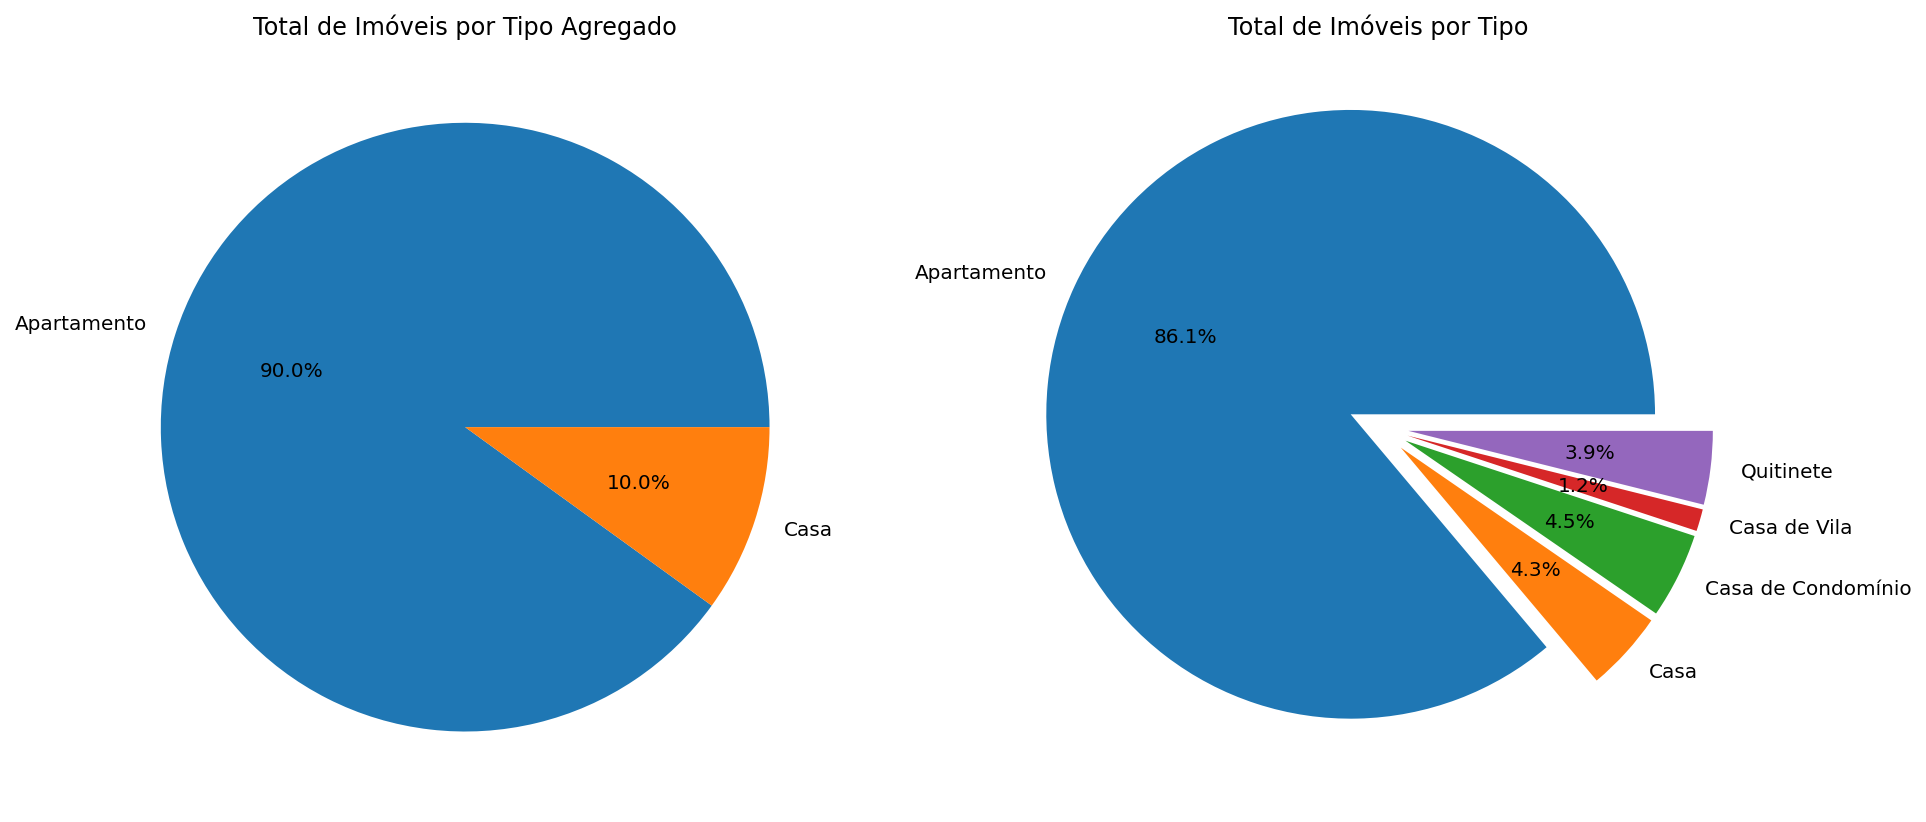

In [49]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

## Fim